Ce notebook propose une analyse du Dataset 2a de la BCI Competition, qui comporte quatre classes : left hand (main gauche), right hand (main droite), tongue (langue) et feet (pieds). L'objectif est d'observer l'évolution des matrices de covariance des signaux à travers le temp.

<h1> A propos des données </h1>
We conducted a BCI experiment for motor imagery movement (MI movement) of the left and right hands with 52 subjects (19 females, mean age ± SD age = 24.8 ± 3.86 years); Each subject took part in the same experiment, and subject ID was denoted and indexed as s1, s2, …, s52. Subjects s20 and s33 were both-handed, and the other 50 subjects were right-handed.

EEG data were collected using 64 Ag/AgCl active electrodes. A 64-channel montage based on the international 10-10 system was used to record the EEG signals with 512 Hz sampling rates. The EEG device used in this experiment was the Biosemi ActiveTwo system. The BCI2000 system 3.0.2 was used to collect EEG data and present instructions (left hand or right hand MI). Furthermore, we recorded EMG as well as EEG simultaneously with the same system and sampling rate to check actual hand movements. Two EMG electrodes were attached to the flexor digitorum profundus and extensor digitorum on each arm.

Subjects were asked to imagine the hand movement depending on the instruction given. Five or six runs were performed during the MI experiment. After each run, we calculated the classification accuracy over one run and gave the subject feedback to increase motivation. Between each run, a maximum 4-minute break was given depending on the subject’s demands.

<h1>Importation et Prétraitement des Données :</h1> Les données de la première session du premier sujet sont chargées à partir du Dataset 2a. Les segments correspondant à chaque classe (left hand, right hand, tongue, feet) sont extraits de la  première session du premier run du premier sujet.

In [4]:
import mne
import moabb
from moabb.datasets import Cho2017

In [5]:
dataset =Cho2017()

In [6]:
print(dataset.subject_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]


In [7]:
dataset.subject_list = [1]

In [8]:
sessions = dataset.get_data(subjects=[1])

c:\Users\ja_to\anaconda3\envs\MyTestEnv\lib\site-packages\moabb\datasets\download.py:55: RuntimeWarning: Setting non-standard config type: "MNE_DATASETS_GIGADB_PATH"
  set_config(key, get_config("MNE_DATA"))
100%|#######################################| 203M/203M [02:31<00:00, 1.34MB/s]
SHA256 hash of downloaded file: 57f2f10056b3c240adc78324872597d9b06b282df537a7763e98467275efe6db
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
Trials demeaned and stacked with zero buffer to create continuous data -- edge effects present


In [9]:
print(sessions)

{1: {'0': {'0': <RawArray | 69 x 717300 (1401.0 s), ~377.7 MB, data loaded>}}}


In [11]:
subject = 1
session_name = "0"
run_name = "0"
raw = sessions[subject][session_name][run_name]

In [8]:
subject = 1
session_name = "0train"
run_name = "1"
raw_1 = sessions[subject][session_name][run_name]

In [12]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG, 4 EMG, 1 Stimulus
 custom_ref_applied: False
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 0.0 Hz
 lowpass: 256.0 Hz
 meas_date: unspecified
 nchan: 69
 projs: []
 sfreq: 512.0 Hz
>


In [13]:
print(raw.get_data().shape)

(69, 717300)


In [14]:
print(raw.get_data())

[[ 0.01911815  0.01907314  0.01916089 ...  0.00456925  0.00444675
   0.00440625]
 [ 0.00942241  0.00952016  0.00975041 ...  0.00086175  0.00076975
   0.000784  ]
 [ 0.03012397  0.03014472  0.03021397 ... -0.00784564 -0.00794614
  -0.00802414]
 ...
 [ 0.05447591  0.05605265  0.05577391 ... -0.02165209 -0.02184809
  -0.02170484]
 [-0.04225886 -0.04114436 -0.04129036 ...  0.02716156  0.02696856
   0.02726106]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


Using matplotlib as 2D backend.


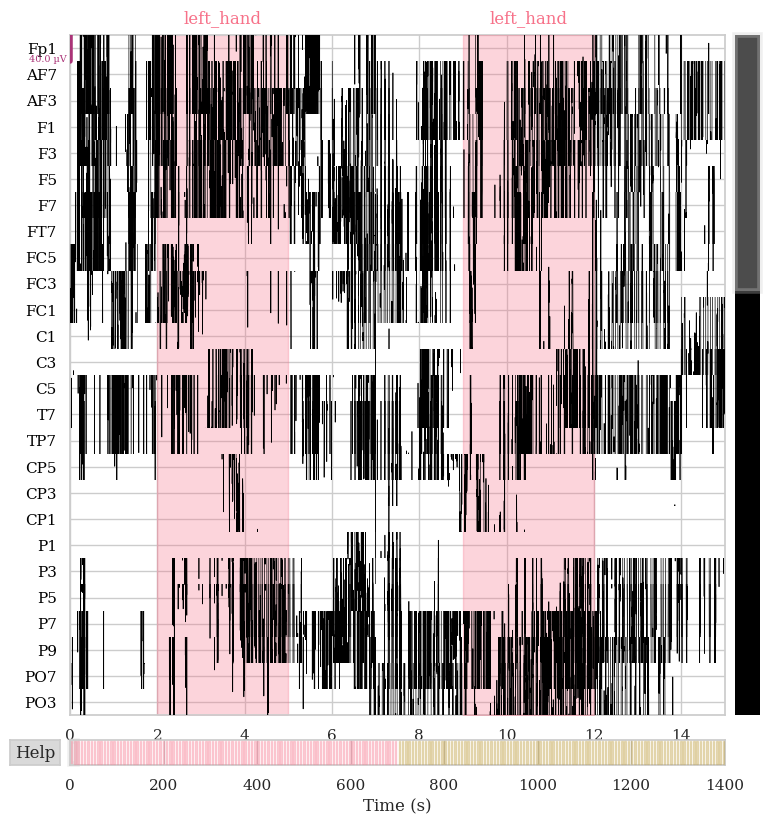

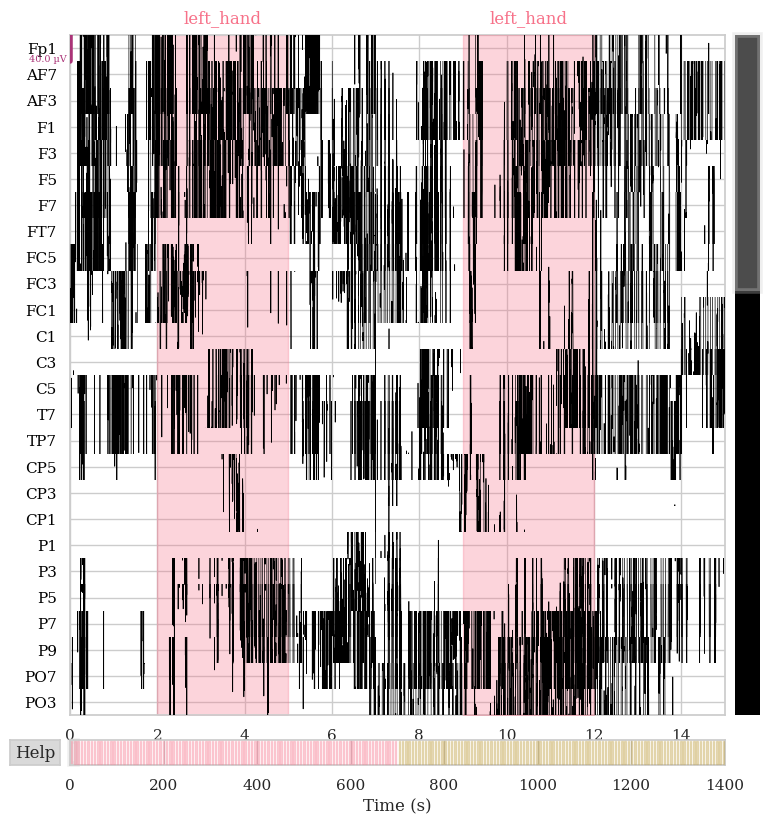

In [15]:
raw.plot(duration=15, n_channels=26)

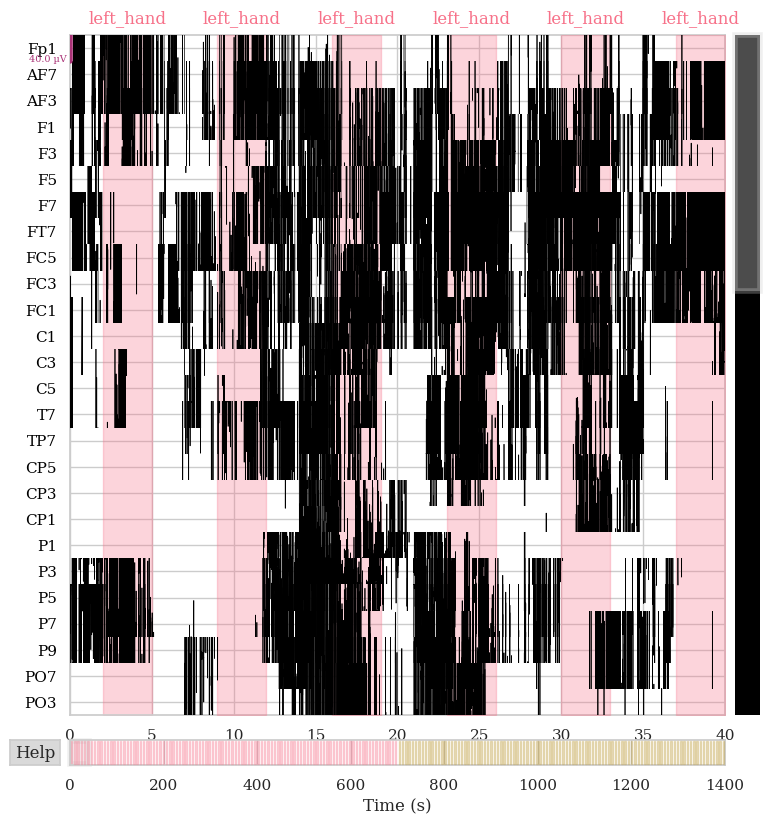

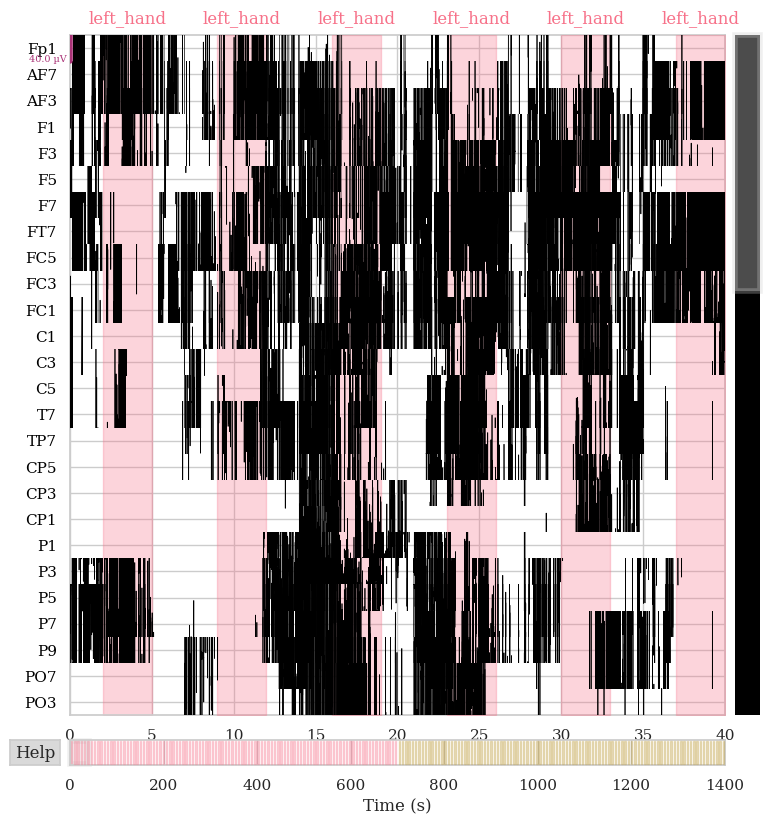

In [16]:
raw.plot(duration=40, n_channels=26)

<h1>Calcul de la Covariance :</h1> 
À partir des données EEG, la covariance est calculée toutes les deux secondes. Cela permet de capturer les relations linéaires entre les différentes électrodes à travers le temps.
Il existe plusieur méthode dans mne pourle calcule de la covariance parmis ces méthodes il  y'a la méthode empirique ainsi que ‘diagonal_fixed’, ‘shrunk’, ‘oas’, ‘ledoit_wolf’, ‘factor_analysis’, ‘shrinkage’. Dans cette exemple je vais utiliser la méthode empirique.

In [17]:
cov = mne.compute_raw_covariance(raw, tmin=0, tmax=4,method='empirical')

Using up to 20 segments


Number of samples used : 2040
[done]


In [18]:
print(cov.data.shape)

(64, 64)


In [19]:
print(cov.data)

[[ 3.51887632e-06  2.71841636e-06  2.21409279e-06 ... -1.38277217e-07
  -6.81787585e-08 -1.51827039e-07]
 [ 2.71841636e-06  2.30702603e-06  1.78882132e-06 ... -4.83002395e-08
   3.22694679e-08 -1.07410135e-07]
 [ 2.21409279e-06  1.78882132e-06  1.48338116e-06 ... -5.71736282e-08
  -1.15720978e-08 -9.53677121e-08]
 ...
 [-1.38277217e-07 -4.83002395e-08 -5.71736282e-08 ...  1.56800127e-07
   1.04728959e-07  7.09337268e-08]
 [-6.81787585e-08  3.22694679e-08 -1.15720978e-08 ...  1.04728959e-07
   1.84001320e-07  3.32931410e-08]
 [-1.51827039e-07 -1.07410135e-07 -9.53677121e-08 ...  7.09337268e-08
   3.32931410e-08  7.81376260e-08]]


    The projection vectors do not apply to these channels.


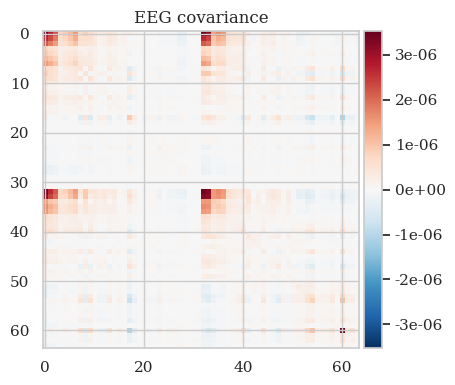

(<Figure size 380x370 with 2 Axes>, None)

In [20]:
cov.plot(raw.info, proj=True, show_svd=False)

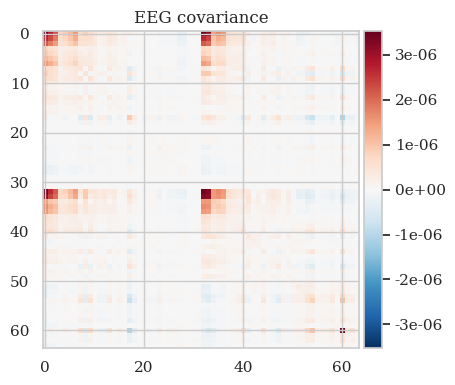

(<Figure size 380x370 with 2 Axes>, None)

In [21]:
mne.viz.plot_cov(cov, raw.info, show_svd=False)